# Overfitting

## Librairies

In [122]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

## Create dataset

In [123]:
def f(x):
    
    return 3*x**3 - 2*x**2 + 7*x + 13

In [124]:
X = np.random.uniform(-10, 10, size=(300))
y = f(X) + np.random.normal(0, 500, size=(300))

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240,), (60,), (240,), (60,))

In [127]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 1), (60, 1), (240,), (60,))

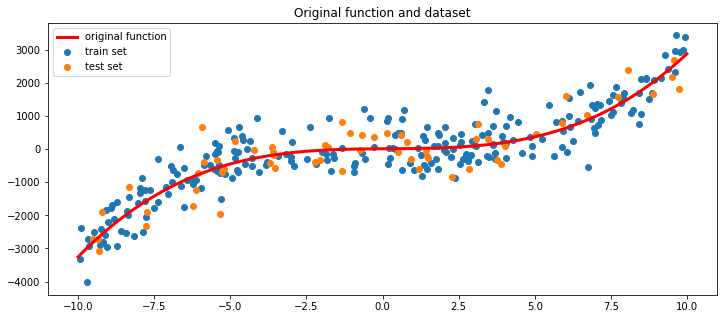

In [128]:
plt.figure(figsize=(12, 5))


x_points = np.linspace(-10, 10, num=100)
plt.plot(x_points, f(x_points), label="original function", color="red", linewidth=3)

plt.scatter(X_train, y_train, label="train set")
plt.scatter(X_test, y_test, label="test set")

plt.title('Original function and dataset')
plt.legend()
plt.show()

## Models

### Linear regression

In [132]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_preds = lr.predict(X_train)
y_test_preds = lr.predict(X_test)

In [133]:
err_train = mean_squared_error(y_train, y_train_preds)
err_test = mean_squared_error(y_test, y_test_preds)

err_train, err_test

(488206.78156191384, 443734.5631212317)

### Polynomial regressions

In [150]:
train_test_errors = []

for n in range(1, 10):
        
    poly_fts = PolynomialFeatures(n)
    X_train_new = poly_fts.fit_transform(X_train)#.reshape(-1, 1)
    X_test_new = poly_fts.transform(X_test)#.reshape(-1, 1)
        
    lr = LinearRegression()
    lr.fit(X_train_new, y_train)
    
    y_train_preds = lr.predict(X_train_new)
    y_test_preds = lr.predict(X_test_new)
    
    err_train = mean_squared_error(y_train, y_train_preds)
    err_test = mean_squared_error(y_test, y_test_preds)
    
    train_test_errors.append((err_train, err_test))

In [151]:
train_test_errors

[(488206.78156191384, 443734.5631212317),
 (486649.4969348677, 441377.47447278735),
 (250313.15428601005, 278236.86128287704),
 (250312.38785322788, 278118.79245942953),
 (249504.01510020747, 285418.99995566544),
 (246551.21430343113, 296639.69653824583),
 (246471.33831461513, 295759.1975139582),
 (245891.46072599894, 294253.72616097913),
 (245670.51297892103, 293905.324965775)]

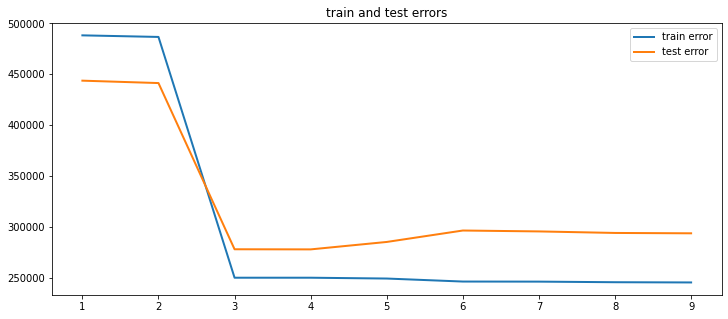

In [152]:
plt.figure(figsize=(12, 5))

poly_degrees = list(range(1, 10))
train_errors = [x[0] for x in train_test_errors]
test_errors = [x[1] for x in train_test_errors]

plt.plot(poly_degrees, train_errors, label="train error", linewidth=2)
plt.plot(poly_degrees, test_errors, label="test error", linewidth=2)

plt.title('train and test errors')
plt.legend()
plt.show()